# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [69]:
import pandas as pd
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00,6.000000,5200.00000,10.00,Time,NaN,NaN,NaN,...,NaN,NaN,866.666667,0.414525,NaN,27.294778,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00,4.908739,300.00000,28.00,Volume,310.0,0.8,5.0,...,2891.666665,NaN,40.743665,23.000062,30.557749,2.576075,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00,15.343900,3800.00000,83.30,Volume,190.0,2.0,35.0,...,759.000000,1.491,249.217919,2.192086,32.791831,21.825600,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,NaN,NaN,...,NaN,NaN,75.000000,2.166907,NaN,12.554300,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.495000,250.00000,4.50,Volume,NaN,1.6,32.0,...,NaN,NaN,167.224093,1.818182,NaN,52.220566,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00,47.940002,NaN,110.00,Mix,142.0,0.8,150.0,...,90.809524,NaN,NaN,0.178441,NaN,9.176959,39.682540,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29,10.178760,4500.00000,57.00,Volume,190.0,0.8,8.0,...,1708.095230,1.625,442.097088,1.236822,51.086775,6.040393,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00,14.752500,2331.50137,51.57,Time,170.0,1.4,4.0,...,842.857154,1.850,158.041107,4.446077,30.367735,22.367525,45.833333,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,NaN,NaN,...,NaN,NaN,93.489396,35.386015,32.053507,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

<Axes: >

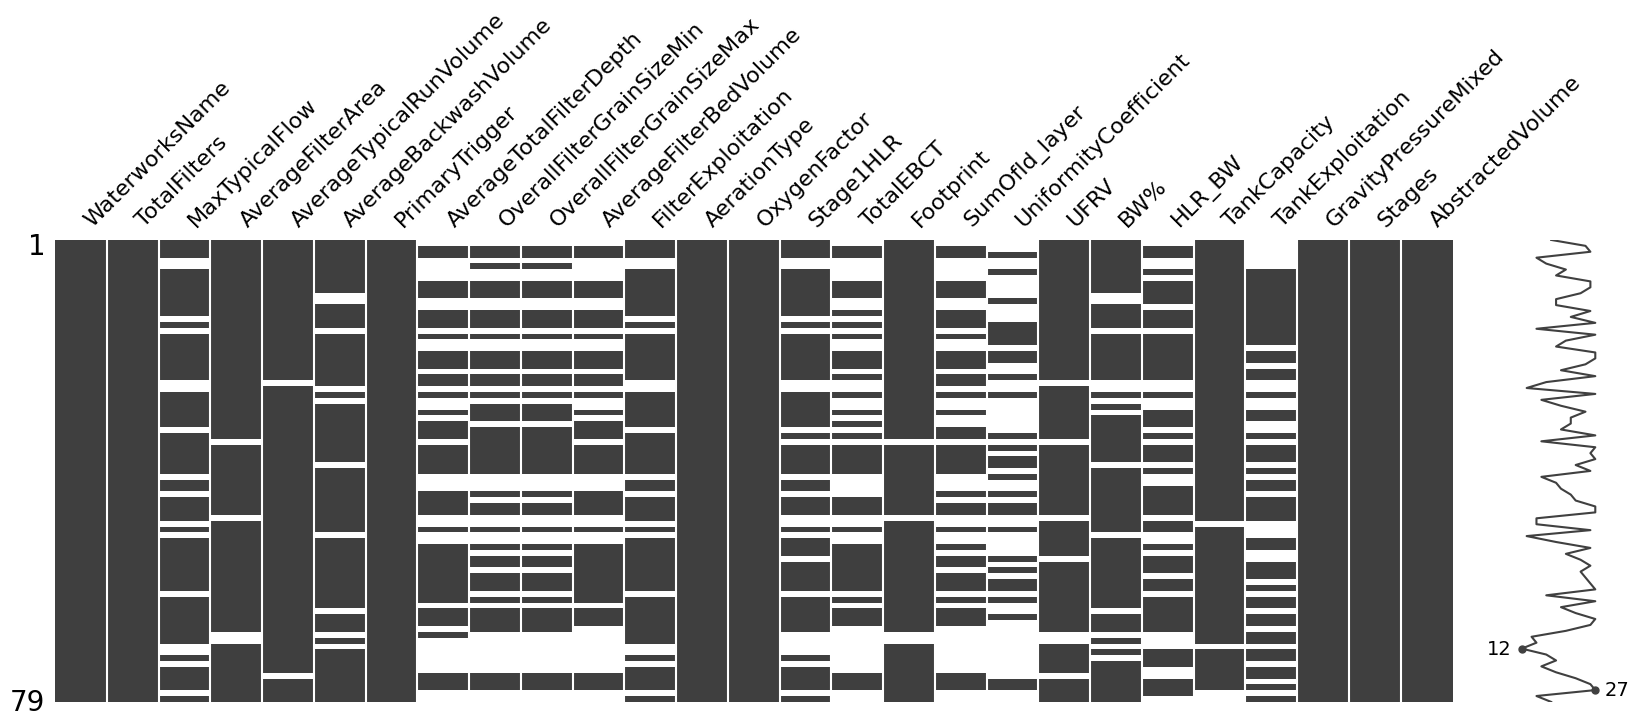

In [70]:
# Identify columns with lots of NaN columns
import missingno as msno
msno.matrix(df, figsize = (20, 6))

In [71]:
#Drop irrelevant columns with too many Null values based on the previous graph
df = df.drop(["WaterworksName", "AverageTotalFilterDepth", "OverallFilterGrainSizeMax", "OverallFilterGrainSizeMin", "AverageFilterBedVolume", "TotalEBCT", "SumOfld_layer", "UniformityCoefficient", "TankExploitation", "HLR_BW"], axis=1)
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.00000,10.00,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,110.00,4.908739,300.00000,28.00,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,120.00,15.343900,3800.00000,83.30,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
3,2,NaN,16.000000,1200.00000,26.00,Volume,NaN,Cascade,2.073333,NaN,194.588021,75.000000,2.166907,12.554300,Gravity,Single,156998
4,2,NaN,1.495000,250.00000,4.50,Volume,NaN,Cascade,1.313333,NaN,412.300024,167.224093,1.818182,52.220566,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,16,1426.00,47.940002,NaN,110.00,Mix,91.698648,Cascade,1.546667,5.242647,24.106636,NaN,0.178441,9.176959,Gravity,Double,11454775
75,20,1407.29,10.178760,4500.00000,57.00,Volume,89.405620,Passive plate aerator,2.133333,6.912876,22.050800,442.097088,1.236822,6.040393,Pressure,Single,11021800
76,6,250.00,14.752500,2331.50137,51.57,Time,19.331598,Bottom aeration,1.673333,2.824380,209.076387,158.041107,4.446077,22.367525,Gravity,Single,423362
77,12,NaN,37.437401,4400.00000,134.00,Volume,NaN,Cascade,2.200000,NaN,152.513970,93.489396,35.386015,NaN,Gravity,Double,1521895


In [72]:
# Drop missing NaN values
df = df.dropna()

df.count()
df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,FilterExploitation,AerationType,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,GravityPressureMixed,Stages,AbstractedVolume
0,6,50.00,6.000000,5200.000000,10.000000,Time,57.886530,Cascade,1.880000,1.388889,143.341204,866.666667,0.414525,27.294778,Gravity,Single,253543
1,4,110.00,4.908739,300.000000,28.000000,Volume,63.521586,Air injection,1.620000,11.204508,16.714412,40.743665,23.000062,2.576075,Pressure,Double,612094
2,4,120.00,15.343900,3800.000000,83.300000,Volume,64.908486,Bottom aeration,2.213333,3.935020,44.693822,249.217919,2.192086,21.825600,Gravity,Double,682318
5,12,215.00,14.299999,2833.333333,30.000000,Volume,70.189020,Cascade,1.786667,1.879371,86.539475,148.601406,1.411789,26.506498,Gravity,Double,1321940
6,5,51.00,4.000000,870.000000,10.500000,Volume,40.547721,Cascade,1.406667,12.750000,20.232778,87.500000,4.050212,4.835745,Gravity,Double,181151
7,7,112.17,6.610000,3342.857143,23.000000,Volume,77.547412,Bottom aeration,1.940000,4.242436,40.823385,302.571861,1.517347,16.612073,Pressure,Mixed,761988
8,12,211.00,13.316667,22000.000000,19.000000,Volume,66.710706,Bottom aeration,1.660000,2.604938,61.623258,888.888889,1.306269,7.104312,Gravity,Double,1233054
11,4,149.92,10.750000,2365.000000,31.000000,Time,37.897685,Cascade,1.873333,3.699901,76.341163,233.464956,1.299150,6.864238,Gravity,Single,497710
12,3,110.00,8.042477,3495.079452,34.000000,Time,64.436903,Bottom aeration,2.180000,4.559126,38.551646,434.577465,0.999333,14.108234,Mixed,Single,620914
14,3,139.20,16.594501,5700.000000,129.400000,Volume,81.532272,Bottom aeration,1.815333,2.796107,86.252698,343.487269,2.270172,6.696453,Gravity,Single,994198


In [83]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.columns.difference(numeric_cols)  # This should give the other 4 columns

# Initialize the StandardScaler and scale only the numeric columns
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(df[numeric_cols])

# Convert scaled data back to DataFrame with correct column names
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols, index=df.index)

# Concatenate scaled numeric data with the remaining categorical data
final_df = pd.concat([scaled_numeric_df, df[categorical_cols]], axis=1)

final_df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,AbstractedVolume,AerationType,GravityPressureMixed,PrimaryTrigger,Stages
0,-0.107791,-0.602684,-0.729469,0.022885,-0.912557,-0.187768,0.041566,-0.859583,1.738698,2.884353,-0.555400,0.674158,-0.506687,Cascade,Gravity,Time,Single
1,-0.587953,-0.355830,-0.903540,-0.513170,-0.278747,0.056543,-1.011908,1.468264,-1.123495,-1.373934,6.463783,-0.975370,-0.295808,Air injection,Pressure,Volume,Double
2,-0.587953,-0.314688,0.761017,-0.130274,1.668455,0.116673,1.392172,-0.255749,-0.491066,-0.299084,-0.002966,0.309189,-0.254507,Bottom aeration,Gravity,Volume,Double
5,1.332693,0.076164,0.594500,-0.236026,-0.208324,0.345613,-0.336604,-0.743262,0.454787,-0.817842,-0.245469,0.621554,0.121681,Cascade,Gravity,Volume,Double
6,-0.347872,-0.598570,-1.048497,-0.450813,-0.894951,-0.939501,-1.876296,1.834789,-1.043968,-1.132868,0.574507,-0.824578,-0.549263,Cascade,Gravity,Volume,Double
7,0.132289,-0.346902,-0.632165,-0.180285,-0.454806,0.664641,0.284675,-0.182843,-0.578550,-0.024002,-0.212663,-0.038720,-0.207650,Bottom aeration,Pressure,Volume,Mixed
8,1.332693,0.059707,0.437644,1.860787,-0.595652,0.194809,-0.849835,-0.571188,-0.108403,2.998926,-0.278262,-0.673192,0.069403,Bottom aeration,Gravity,Volume,Double
11,-0.587953,-0.191590,0.028224,-0.287262,-0.173113,-1.054395,0.014553,-0.311509,0.224271,-0.380303,-0.280475,-0.689212,-0.363082,Cascade,Gravity,Time,Single
12,-0.828034,-0.355830,-0.403664,-0.163632,-0.067478,0.096227,1.257112,-0.107738,-0.629899,0.656591,-0.373652,-0.205806,-0.290621,Bottom aeration,Mixed,Time,Single
14,-0.828034,-0.235695,0.960505,0.077584,3.291710,0.837406,-0.220452,-0.525851,0.448305,0.186949,0.021302,-0.700409,-0.071078,Bottom aeration,Gravity,Volume,Single


In [85]:
# Factorize each categorical column in-place
for col in categorical_cols:
    df[col], _ = pd.factorize(df[col])

/var/folders/sl/pdxv_bjx4rq5n98q3q5fmrtw0000gp/T/ipykernel_17024/1576959560.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col], _ = pd.factorize(df[col])


In [87]:
# Scale numeric data (using previous steps)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols, index=df.index)

# Factorize the categorical columns
factorized_categorical_df = df[categorical_cols].apply(lambda x: pd.factorize(x)[0])

# Concatenate scaled numeric data with factorized categorical data
final_df = pd.concat([scaled_numeric_df, factorized_categorical_df], axis=1)

final_df

,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,FilterExploitation,OxygenFactor,Stage1HLR,Footprint,UFRV,BW%,TankCapacity,AbstractedVolume,AerationType,GravityPressureMixed,PrimaryTrigger,Stages
0,-0.107791,-0.602684,-0.729469,0.022885,-0.912557,-0.187768,0.041566,-0.859583,1.738698,2.884353,-0.555400,0.674158,-0.506687,0,0,0,0
1,-0.587953,-0.355830,-0.903540,-0.513170,-0.278747,0.056543,-1.011908,1.468264,-1.123495,-1.373934,6.463783,-0.975370,-0.295808,1,1,1,1
2,-0.587953,-0.314688,0.761017,-0.130274,1.668455,0.116673,1.392172,-0.255749,-0.491066,-0.299084,-0.002966,0.309189,-0.254507,2,0,1,1
5,1.332693,0.076164,0.594500,-0.236026,-0.208324,0.345613,-0.336604,-0.743262,0.454787,-0.817842,-0.245469,0.621554,0.121681,0,0,1,1
6,-0.347872,-0.598570,-1.048497,-0.450813,-0.894951,-0.939501,-1.876296,1.834789,-1.043968,-1.132868,0.574507,-0.824578,-0.549263,0,0,1,1
7,0.132289,-0.346902,-0.632165,-0.180285,-0.454806,0.664641,0.284675,-0.182843,-0.578550,-0.024002,-0.212663,-0.038720,-0.207650,2,1,1,2
8,1.332693,0.059707,0.437644,1.860787,-0.595652,0.194809,-0.849835,-0.571188,-0.108403,2.998926,-0.278262,-0.673192,0.069403,2,0,1,1
11,-0.587953,-0.191590,0.028224,-0.287262,-0.173113,-1.054395,0.014553,-0.311509,0.224271,-0.380303,-0.280475,-0.689212,-0.363082,0,0,0,0
12,-0.828034,-0.355830,-0.403664,-0.163632,-0.067478,0.096227,1.257112,-0.107738,-0.629899,0.656591,-0.373652,-0.205806,-0.290621,2,2,0,0
14,-0.828034,-0.235695,0.960505,0.077584,3.291710,0.837406,-0.220452,-0.525851,0.448305,0.186949,0.021302,-0.700409,-0.071078,2,0,1,0
